In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
from tqdm import tqdm 


# Intraorbital SC
We start considering only the intraorbital SC order parameter in the HF Hamiltonian, so we study
\begin{equation}
H =
\end{equation}

# Parameters definition

In [14]:
t1 = 1.0
t2 = 1.0

def Ek(t, k):
    E = -2*t*(np.cos(k[0]) + np.cos([k[1]]))
    return E

def lamb(Ek, U, J, Del):
    l = np.sqrt( np.square( Ek + (3*U-5*J)/2 ) + np.square(U*Del) )
    return l

def lamb_intra(Ek, U, J, Del):
    l = np.sqrt( np.square( Ek + (3*U-5*J)/2 ) + np.square((U - 2*J)*Del) )
    return l

In [15]:
""" How many k points in the BZ """

grid_kx = np.linspace(-np.pi, np.pi, 100, endpoint = False)
grid_ky = np.linspace(-np.pi, np.pi, 100, endpoint = False)
grid_Ek = np.zeros((len(grid_kx), len(grid_ky)))

energy_Del0 = 0

for (i, kx) in enumerate(grid_kx): 
    for (j, ky) in enumerate(grid_ky):
        k = np.array([kx, ky])
        grid_Ek[i][j] = Ek(t1, k)
        energy_Del0 += -lamb(grid_Ek[i][j], U, J, 0) + (grid_Ek[i][j] + (3*U-5*J)/2)
        
energy_Del0 = energy_Del0/np.square(len(grid_kx))
energy_Del0

-1.6208723769030127

In [13]:
U = -10
J = 3/5*U
guess = 0.5

for m in range(20):
    Del = 0.0
    for (i, kx) in enumerate(grid_kx): 
        for (j, ky) in enumerate(grid_ky):
            Del += 1.0/lamb(grid_Ek[i][j], U, J, guess) 
    Del = Del*abs(U)/np.square(len(grid_kx))*guess
    print(m, Del)
    if(abs(Del - guess) < 1.0E-3):
        break
    guess = guess*0.5 + Del*0.5

energy_Del = 0.0
for (i, kx) in enumerate(grid_kx): 
    for (j, ky) in enumerate(grid_ky):
        energy_Del += -lamb(grid_Ek[i][j], U, J, Del) + (grid_Ek[i][j] + (3*U-5*J)/2)
        
energy_Del = energy_Del/np.square(len(grid_kx))
energy_Del

0 0.9359531670489161
1 0.9655248404134725
2 0.9741564600396196
3 0.9775281141008386
4 0.979046774877956
5 0.9797800935013926
6 0.9801467450394686
7 0.9803333457577655
8 0.9804291812399331
9 0.9804786326753789
10 0.9805042118394165


-10.004500776823372

In [ ]:
U_array = np.r_[ -10 : -0.1 : 30j ]
J_array = np.r_[ -10 : 2 : 30j ]

Del_array = np.zeros([len(U_array),len(J_array)])
#print(Del_array)
for l in tqdm(range(len(U_array))):
    for s in range(len(J_array)):
        for m in range(20):
            Del = 0.0
            for (i, kx) in enumerate(grid_kx): 
                for (j, ky) in enumerate(grid_ky):
                    k = np.array([kx, ky])
                    grid_Ek[i][j] = Ek(t1, k)
                    Del += 1.0/lamb(grid_Ek[i][j], U_array[l], J_array[s], guess) 
            Del = Del*abs(U_array[l])/np.square(len(grid_kx))*guess
            #print(m, Del)
            if(abs(Del - guess) < 1.0E-3):
                energy_Del = 0.0
                for (i, kx) in enumerate(grid_kx): 
                    for (j, ky) in enumerate(grid_ky):
                        energy_Del += -lamb(grid_Ek[i][j], U, J, Del) + (grid_Ek[i][j] + (3*U-5*J)/2)

                energy_Del = energy_Del/np.square(len(grid_kx))
                if(energy_Del < energy_Del0):
                    Del_array[l][s] = Del
                else:
                    Del_array[l][s] = 0.0
                break
            guess = guess*0.5 + Del*0.5
#print(Del_array)



 37%|███████████████▊                           | 11/30 [10:04<16:38, 52.57s/it]

In [ ]:
"""Plot of the order parameter"""
cmaps = ['viridis', 'coolwarm']

plt.figure()

vmin_Del, vmax_Del = np.min(Del_array), np.max(Del_array)
#plt.pcolormesh(J_array, U_array, Del_array , cmap=cmaps[1], vmin=vmin_Del, vmax=vmax_Del)
plt.contourf(J_array, U_array, Del_array, cmap=cmaps[1], vmin=vmin_Del, vmax=vmax_Del)
plt.colorbar()
plt.title(r'')
plt.grid()
plt.xlim([-10,10])
plt.ylim([-10,0])
plt.xlabel(r'$J$')
plt.ylabel(r'$U$')
y = 5/3*J_array
plt.plot(J_array, y, '-', color = 'black')
plt.show()

# Intra-orbital SC

In [79]:
U = -10
J = 0
guess = 0.5
for m in range(50):
    Del = 0.0
    for (i, kx) in enumerate(grid_kx): 
        for (j, ky) in enumerate(grid_ky):
            k = np.array([kx, ky])
            grid_Ek[i][j] = Ek(t1, k)
            Del += 1.0/lamb_intra(grid_Ek[i][j], U, J, guess) 
    #print(m, Del)
    Del = Del*abs(U-2*J)/np.square(len(grid_kx))*guess
    print(m, Del)
    if(abs(Del - guess) < 1.0E-3):
        break
    guess = guess*0.5 + Del*0.5
    #print(m, guess)

0 0.32062882577146146
1 0.26787018772852994
2 0.2240676059275379
3 0.18761017809853758
4 0.15720022460079197
5 0.13179082324659971
6 0.11053193673955074
7 0.09272843671436143
8 0.07780823979870531
9 0.06529808674464678
10 0.05480490617808667
11 0.04600125135569184
12 0.038613745098221755
13 0.03241378845424984
14 0.02721000765635476
15 0.022842061517171365
16 0.01917553122950631
17 0.01609768304274242
18 0.013513942336137917
19 0.011344952176612126
20 0.009524114984301361
21 0.007995535276816911
22 0.0067122964573775425
23 0.005635016456293569
24 0.00473063653676756
25 0.003971405290232744
26 0.003334026167080167
27 0.0027989421026729773
28 0.0023497351211735906
29 0.0019726223962653303


In [56]:
U_array = np.r_[ -10 : -0.1 : 6j ]
J_array = np.r_[ -10 : 10 : 11j ]

Del_array = np.zeros([len(U_array),len(J_array)])

for l in tqdm(range(len(U_array))):
    for s in range(len(J_array)):
        for m in range(20):
            Del = 0.0
            for (i, kx) in enumerate(grid_kx): 
                for (j, ky) in enumerate(grid_ky):
                    k = np.array([kx, ky])
                    grid_Ek[i][j] = Ek(t1, k)
                    Del += 1.0/lamb_intra(grid_Ek[i][j], U_array[l], J_array[s], guess) 
            Del = -0.5*Del*(U_array[l]-2*J_array[s])/np.square(len(grid_kx))*guess
            #print(m, Del)
            if(abs(Del - guess) < 1.0E-3):
                Del_array[l][s] = Del
                break
            guess = guess*0.5 + Del*0.5

100%|█████████████████████████████████████████████| 6/6 [00:25<00:00,  4.33s/it]


In [57]:
np.max(Del_array)

0.0006439362602892076

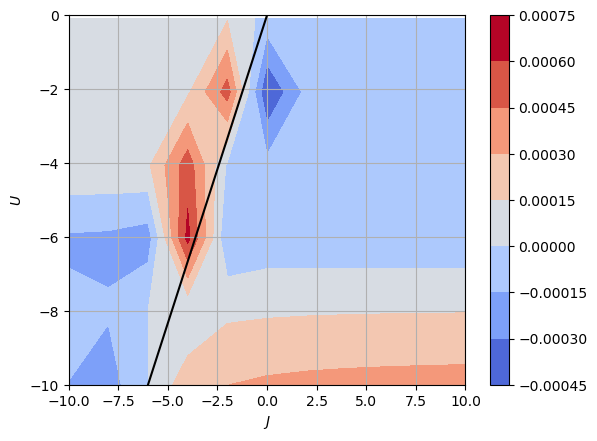

In [58]:
"""Plot of the order parameter"""
cmaps = ['viridis', 'coolwarm']

plt.figure()

vmin_Del, vmax_Del = np.min(Del_array), np.max(Del_array)
#plt.pcolormesh(J_array, U_array, Del_array , cmap=cmaps[1], vmin=vmin_Del, vmax=vmax_Del)
plt.contourf(J_array, U_array, Del_array, cmap=cmaps[1], vmin=vmin_Del, vmax=vmax_Del)
plt.colorbar()
plt.title(r'')
plt.grid()
plt.xlim([-10,10])
plt.ylim([-10,0])
plt.xlabel(r'$J$')
plt.ylabel(r'$U$')
y = 5/3*J_array
plt.plot(J_array, y, '-', color = 'black')
plt.show()